In [26]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from os import path,listdir
import uproot
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from scripts import plotFeatures

In [28]:
root_basenames= [file_basename for file_basename in listdir("root_files") if file_basename.endswith(".root") ]
root_files = [path.join("root_files",root_basename) for root_basename in root_basenames]

Problem Definition:

Let's say $N \in Z^+$. $N \sim N_{dist}$ where $N_{dist}$ is the distribution of the possible number of particles in a thermal shower experiment.

Let's say $hit\_values \in R^4$ and $hit\_values = <hit_x,hit_y,hit_z,hit_e>$.

$hit_x \sim X_{dist}$ 

$hit_y \sim Y_{dist}$ 

$hit_z \sim Z_{dist}$ 

$hit_e \sim E_{dist}$ 

The aim is to find five probability distributions which are $X_{dist}, Y_{dist}, Z_{dist}, E_{dist}, P_{dist}$ to finally generate an $N$ sized array of $hit\_values$.

 



<span style="font-size:24px;">Empirical $N_{dist}$ values</span>


Mean : 139356.48583333334
Mean : 25077.70160646969
Max : 179380
Min : 771


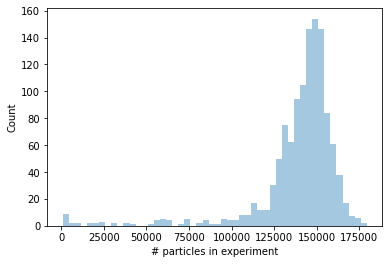

In [29]:
experiment_counts = []

for root_file in root_files:
    with uproot.open(root_file) as root:
        
        hit_x = np.array(root[b"showers"][b"hit_x"].array())
        
        for exp_x in hit_x:
            experiment_counts.append(len(exp_x))
            

experiment_counts = np.array(experiment_counts)

ax = sns.distplot(experiment_counts,kde=False)
ax.set(xlabel="# particles in experiment",ylabel="Count")

print("Mean : {}".format(np.mean(experiment_counts)))
print("Mean : {}".format(np.std(experiment_counts)))
print("Max : {}".format(np.max(experiment_counts)))
print("Min : {}".format(np.min(experiment_counts)))

<span style="font-size:24px;">Empirical $X_{dist}$ values</span>


Mean : 0.016301987421230454
Std : 22.886422070327388
Max : 190.29022216796875
Min : -189.828125


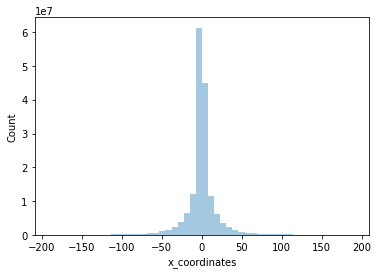

In [30]:
x_values = np.load(path.join("npy","hit_x_combined.npy"))

ss = StandardScaler()
ss.fit(x_values)

transformed_data = ss.transform(x_values)
filter_array = (transformed_data <= 4) & (transformed_data >= -4)  
transformed_data = None

x_values = x_values[filter_array]

ax = sns.distplot(x_values,kde=False)
ax.set(xlabel="x_coordinates",ylabel="Count")

print("Mean : {}".format(np.mean(x_values)))
print("Std : {}".format(np.std(x_values)))
print("Max : {}".format(np.max(x_values)))
print("Min : {}".format(np.min(x_values)))

<span style="font-size:24px;">Empirical $Y_{dist}$ values</span>


Mean : 0.0013293180561942445
Std : 22.714655978792102
Max : 182.6769256591797
Min : -182.73646545410156


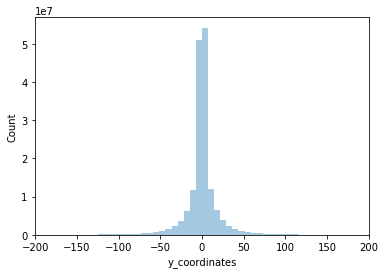

In [31]:
y_values = np.load(path.join("npy","hit_y_combined.npy"))

ss = StandardScaler()
ss.fit(y_values)

transformed_data = ss.transform(y_values)
filter_array = (transformed_data <= 4) & (transformed_data >= -4)  
transformed_data = None

y_values = y_values[filter_array]

ax = sns.distplot(y_values,kde=False)
ax.set(xlabel="y_coordinates",ylabel="Count")

print("Mean : {}".format(np.mean(y_values)))
print("Std : {}".format(np.std(y_values)))
print("Max : {}".format(np.max(y_values)))
print("Min : {}".format(np.min(y_values)))

<span style="font-size:24px;">Empirical $Z_{dist}$ values</span>


Mean : 195.5298423428418
Std : 37.54913420809588
Max : 482.88720703125
Min : -89.38433837890625


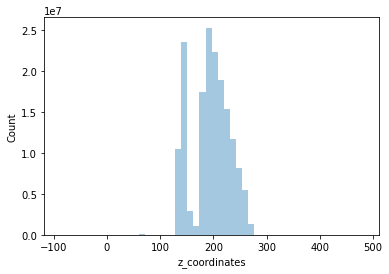

In [32]:
z_values = np.load(path.join("npy","hit_z_combined.npy"))
ss = StandardScaler()
ss.fit(z_values)

transformed_data = ss.transform(z_values)
filter_array = (transformed_data <= 4) & (transformed_data >= -4)  
transformed_data = None

z_values = z_values[filter_array]

ax = sns.distplot(z_values,kde=False)
ax.set(xlabel="z_coordinates",ylabel="Count")

print("Mean : {}".format(np.mean(z_values)))
print("Std : {}".format(np.std(z_values)))
print("Max : {}".format(np.max(z_values)))
print("Min : {}".format(np.min(z_values)))

<span style="font-size:24px;">Empirical $E_{dist}$ values</span>


Mean : 0.00022659348076442543
Std : 0.0006018015815417364
Max : 0.005526063963770866
Min : 0.0


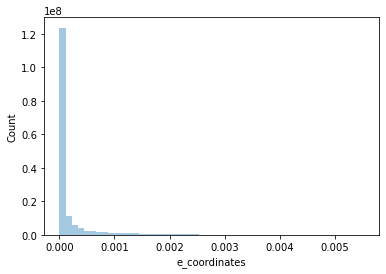

In [34]:
e_values = np.load(path.join("npy","hit_e_combined.npy"))

ss = StandardScaler()
ss.fit(e_values)

transformed_data = ss.transform(e_values)
filter_array = (transformed_data <= 4) & (transformed_data >= -4)  
transformed_data = None

e_values = e_values[filter_array]

ax = sns.distplot(e_values,kde=False)
ax.set(xlabel="e_coordinates",ylabel="Count")

print("Mean : {}".format(np.mean(e_values)))
print("Std : {}".format(np.std(e_values)))
print("Max : {}".format(np.max(e_values)))
print("Min : {}".format(np.min(e_values)))

<span style="font-size:24px;">Correlation map of $hit_x$ $hit_y$ $hit_z$ $hit_e$</span>

          hit_x     hit_y     hit_z     hit_e
hit_x  1.000000 -0.033602  0.003356 -0.001111
hit_y -0.033602  1.000000 -0.016201  0.000328
hit_z  0.003356 -0.016201  1.000000 -0.015122
hit_e -0.001111  0.000328 -0.015122  1.000000


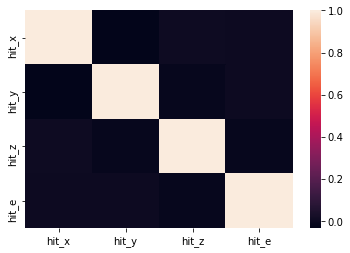

In [6]:
data = np.load(path.join("npy","quadruple_all.npy"),allow_pickle=True)
data = pd.DataFrame(data=data,columns=["hit_x","hit_y","hit_z","hit_e"])

sns.heatmap(data.corr())
print(data.corr())

As it can be seen in the printed table and the graph, the correlation values are near zero. This table concludes that $hit_x$,$hit_y$,$hit_z$ and $hit_e$ are not linearly correlated with each other. They can be treated as independent variables.